In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
# import plotly.express as px

In [4]:
from manofunkcijos import *

In [67]:
DB = cnt.connect(
    host='88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
)
C = DB.cursor()

In [ ]:
#axis.ticklabel_format(style='plain') iprastas formatas

In [11]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select
lytis, group_concat(bdu_spalio) as GC
from DUS2014N
group by lytis;"""
C.execute(sql)
ans = C.fetchall()
lytis, bdusp = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |       F        |6,6,6,13.33,10,6|
| 1 |       M        |6,11.33,6,6,6.67|


In [13]:
len(bdusp)

2

In [14]:
# numpy fromstring
bduspII = []
for i in bdusp:
    skaiciai = np.fromstring(i, sep=',')
    bduspII.append(skaiciai)
print(bduspII)

[array([   6.,    6.,    6., ..., 3670., 4212., 4218.]), array([   6.  ,   11.33,    6.  , ..., 3246.  , 3819.67, 2324.  ])]


In [15]:
txt = '3.25,4.25,7.11,10'
s = np.fromstring(txt, sep=',')
print(s)

[ 3.25  4.25  7.11 10.  ]


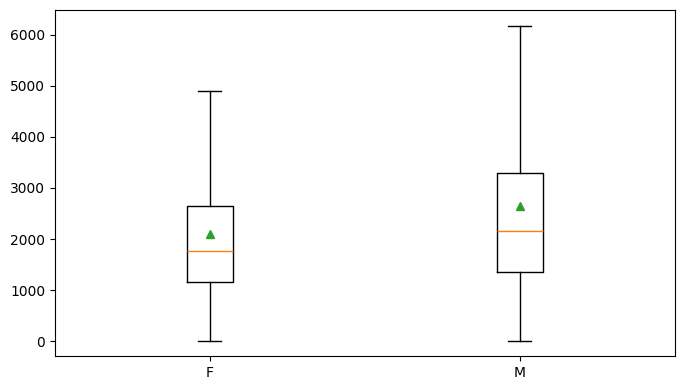

In [18]:
#  boxplot:
fig, axis = plt.subplots(figsize = [8,4.5])

axis.boxplot(bduspII, showmeans = True, showfliers=False)

axis.set_xticklabels(lytis)

plt.show()

| 0 |     14-29      |400,511,915,975,|
| 1 |     30-39      |400,440,1061,178|
| 2 |     40-49      |460,400,400,407,|
| 3 |     50-59      |400,216,505,770,|
| 4 |      60+       |225,663,516,530,|


| 0 |     14-29      |1400,480,520,540|
| 1 |     30-39      |1072,2644,2936,4|
| 2 |     40-49      |1500,5265,480,43|
| 3 |     50-59      |1487,1500,400,48|
| 4 |      60+       |457,756,400,671,|



 Moterys


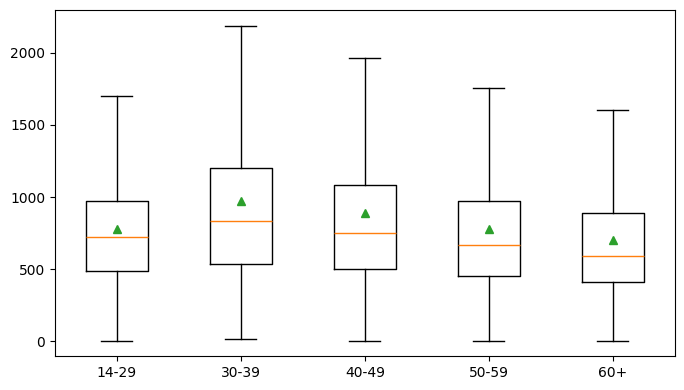


 Vyrai


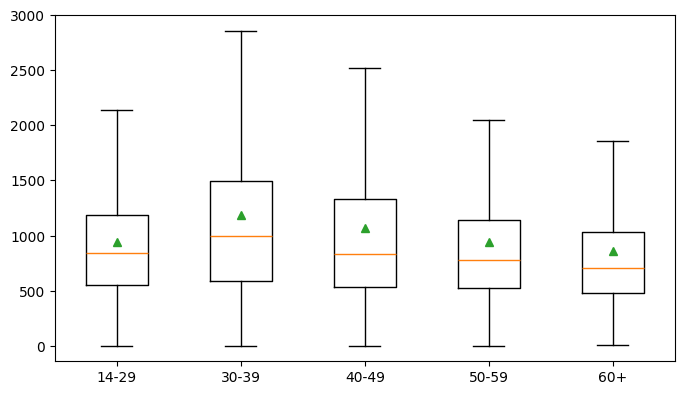

In [35]:
# 1) parodykite su boxplot atlyginimų pasiskirstymus nuo amžiaus grupės 2018 metams (vyrams ir moterims atskirai).
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select amzius, group_concat(bdu_spalio) from DUS2018N
where lytis = 'F'
group by amzius;"""
C.execute(sql)
ans = C.fetchall()
fa, fal = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)
print('\n')
sql="""select amzius, group_concat(bdu_spalio) from DUS2018N
where lytis = 'M'
group by amzius;"""
C.execute(sql)
ans = C.fetchall()
ma, mal = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)
print('\n')
# numpy fromstring
fal2 = []
for i in fal:
    skaiciai = np.fromstring(i, sep=',')
    fal2.append(skaiciai)

mal2 = []
for i in mal:
    skaiciai = np.fromstring(i, sep=',')
    mal2.append(skaiciai)

print('\n','Moterys')
#  boxplot:
fig, axis = plt.subplots(figsize = [8,4.5])

axis.boxplot(fal2, showmeans = True, showfliers=False)

axis.set_xticklabels(fa)

plt.show()
print('\n','Vyrai')
#  boxplot:
fig, axis = plt.subplots(figsize = [8,4.5])

axis.boxplot(mal2, showmeans = True, showfliers=False)

axis.set_xticklabels(ma)

plt.show()
# Taip pat parodykite su boxplot'ais atlyginimų pasiskirstymus nuo išsilavinimo, 2018 metams (visiems respondentams)

| 0 |       G1       |436,1050,440,596|
| 1 |       G2       |460,400,400,400,|
| 2 |       G3       |511,915,975,1087|
| 3 |       G4       |1061,5934,663,55|


| 0 |       G1       |555,686,455,848,|
| 1 |       G2       |1487,1500,1500,4|
| 2 |       G3       |489,769,900,1028|
| 3 |       G4       |1072,1400,2644,2|



 Moterys


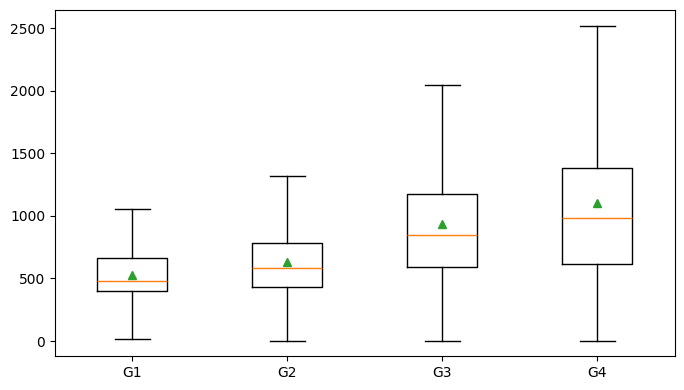


 Vyrai


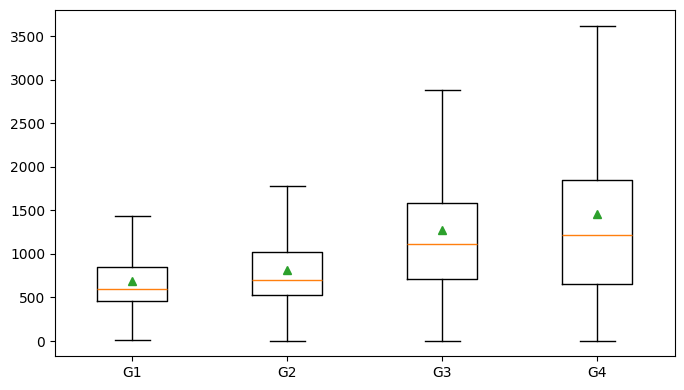

In [37]:
# 2) Taip pat parodykite su boxplot'ais atlyginimų pasiskirstymus nuo išsilavinimo, 2018 metams (visiems respondentams)
# sql="""select issilavinimas, group_concat(bdu_spalio) from DUS2018N
# group by issilavinimas;"""
# C.execute(sql)
# ans = C.fetchall()
# ma, mal = list(map(list, zip(*ans)))
# #? = np.transpose(ans)
# pout(ans)
# print('\n')
# # numpy fromstring
# mal2 = []
# for i in mal:
#     skaiciai = np.fromstring(i, sep=',')
#     mal2.append(skaiciai)

# #  boxplot:
# fig, axis = plt.subplots(figsize = [8,4.5])

# axis.boxplot(mal2, showmeans = True, showfliers=False)

# axis.set_xticklabels(ma)

# plt.show()
sql="""select issilavinimas, group_concat(bdu_spalio) from DUS2018N
where lytis = 'F'
group by issilavinimas;"""
C.execute(sql)
ans = C.fetchall()
fa, fal = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)
print('\n')
sql="""select issilavinimas, group_concat(bdu_spalio) from DUS2018N
where lytis = 'M'
group by issilavinimas;"""
C.execute(sql)
ans = C.fetchall()
ma, mal = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)
print('\n')
# numpy fromstring
fal2 = []
for i in fal:
    skaiciai = np.fromstring(i, sep=',')
    fal2.append(skaiciai)

mal2 = []
for i in mal:
    skaiciai = np.fromstring(i, sep=',')
    mal2.append(skaiciai)

print('\n','Moterys')
#  boxplot:
fig, axis = plt.subplots(figsize = [8,4.5])

axis.boxplot(fal2, showmeans = True, showfliers=False)

axis.set_xticklabels(fa)

plt.show()
print('\n','Vyrai')
#  boxplot:
fig, axis = plt.subplots(figsize = [8,4.5])

axis.boxplot(mal2, showmeans = True, showfliers=False)

axis.set_xticklabels(ma)

plt.show()

| 0 |      BMW       |19500,16190,2890|
| 1 |   Volkswagen   |16490,6500,7300,|
| 2 |      Audi      |1200,5500,7100,1|
| 3 | Mercedes-Benz  |42500,7500,28900|
| 4 |     Toyota     |11900,4250,4350,|


| 0 |     8832.0     |


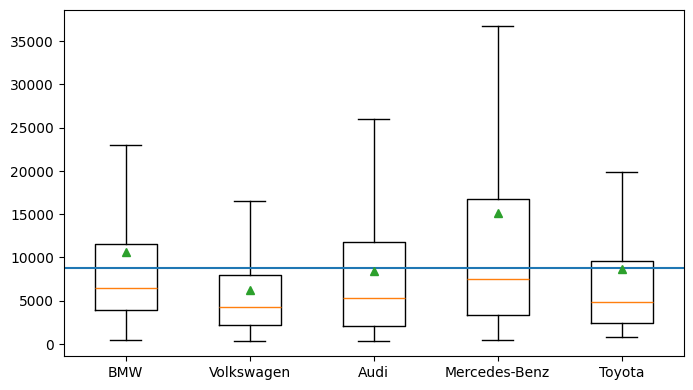

In [34]:
# 3)Pateikite su boxplot'u  skelbimų kainų pasiskirtymą top 5 automobilių gamintojams.
# 3) papildymas: suraskite vidutinę kainą visų automobilių ir atvaizduokite brūkšnį ties ta kaina su komanda axis.axhline(y=JŪSŲ RASTAS SKAIČIUS)
sql="""select gamintojas, group_concat(cast(replace(price,' ','') as float)) as kaina from autopliuslt
group by gamintojas
order by count(*) desc
limit 5;"""
C.execute(sql)
ans = C.fetchall()
x, y = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)
print('\n')
sql="""select  round(avg(cast(replace(price,' ','') as float)),0) as kaina from autopliuslt"""
C.execute(sql)
ans = C.fetchall()
z = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)
# numpy fromstring
y2 = []
for i in y:
    skaiciai = np.fromstring(i, sep=',')
    y2.append(skaiciai)

#  boxplot:
fig, axis = plt.subplots(figsize = [8,4.5])

axis.boxplot(y2, showmeans = True, showfliers=False)

axis.set_xticklabels(x)
axis.axhline(y=z) # brezia linija grafike
plt.show()

In [38]:
l = ['f', 'm']
g = ['14', '15']
lg = []
for li, gi in zip(l, g):
    lg.append(li+gi)
print(lg)

['f14', 'm15']


| 0 |      BMW       |    10652.0     |
| 1 |   Volkswagen   |     6191.0     |
| 2 |      Audi      |     8448.0     |
| 3 | Mercedes-Benz  |    15080.0     |
| 4 |     Toyota     |     8713.0     |


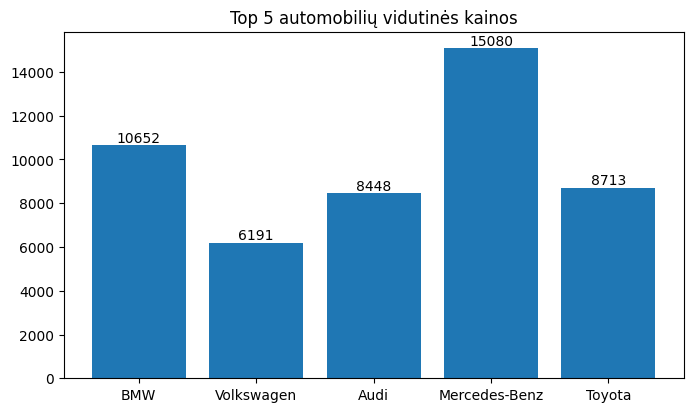

In [58]:
# -- pateikite su bar arba barh vidutines automobilių kainas
# -- top 5 gamintojams, dviem variantais:
# -- a) laikote, kad visi skelbimai yra unikalūs
sql="""select gamintojas, round(avg(cast(replace(price,' ','') as float)),0) as kaina from autopliuslt
group by gamintojas
order by count(*) desc
limit 5;"""
C.execute(sql)
ans = C.fetchall()
x, y = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

fig, axis = plt.subplots(figsize = [8,4.5])

a = axis.bar(x, y)
axis.bar_label(a)
axis.set_title('Top 5 automobilių vidutinės kainos')
plt.show()


| 0 |      BMW       |    10652.0     |    11393.0     |
| 1 |   Volkswagen   |     6191.0     |     6657.0     |
| 2 |      Audi      |     8448.0     |     8982.0     |
| 3 | Mercedes-Benz  |    15080.0     |    15219.0     |
| 4 |     Toyota     |     8713.0     |     8846.0     |


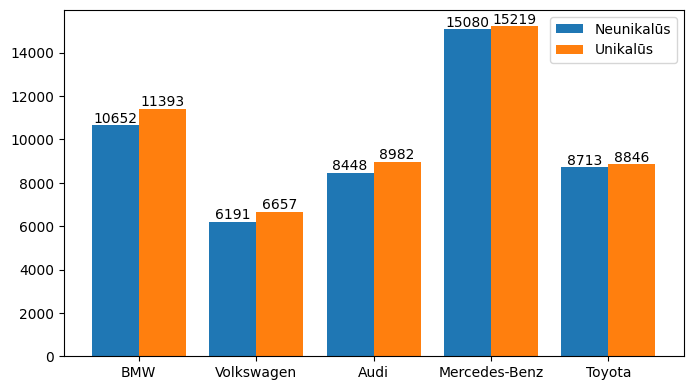

In [64]:
# -- b) eliminuojate pasikartojančius skelbimus (jei skelbimo id kartojasi DB įrašuose
# -- tai skelbimas nėra unikalus, jis dubliuojasi)
sql="""select * from
(select gamintojas, round(avg(cast(replace(price,' ','') as float)),0) as kaina from autopliuslt
group by gamintojas
order by count(*) desc
limit 5) as f
join
(select gamintojas, round(avg(kaina),0) as kaina from
(select distinct id, gamintojas, cast(replace(price,' ','') as float) as kaina  from autopliuslt) as s
group by gamintojas
order by count(*) desc
limit 5) as s
using (gamintojas);"""
C.execute(sql)
ans = C.fetchall()
a,b,c = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

# fig, axis = plt.subplots(figsize = [8,4.5])

# a = axis.bar(x, y)
# axis.bar_label(a)
# axis.set_title('Top 5 automobilių vidutinės kainos')
# plt.show()
fig, axis = plt.subplots(figsize=[8,4.5])
x = np.arange(0,len(a))
w = 0.4
i = axis.bar(x-w/2,b, label='Neunikalūs', width=w)
o = axis.bar(x+w/2, c, label='Unikalūs', width=w)

axis.set_xticks(x)
axis.set_xticklabels(a)
axis.bar_label(i)
axis.bar_label(o)
axis.legend(loc='best')
plt.show()

Rodoma 5 eilutės iš 43
| 0 |    15000.0     |5900,19900,29900|
| 1 |    30000.0     |16800,19900,1000|
| 2 |    45000.0     |32000,14950,2080|
| 3 |    60000.0     |41321,111000,610|
| 4 |    75000.0     |28900,21900,1190|


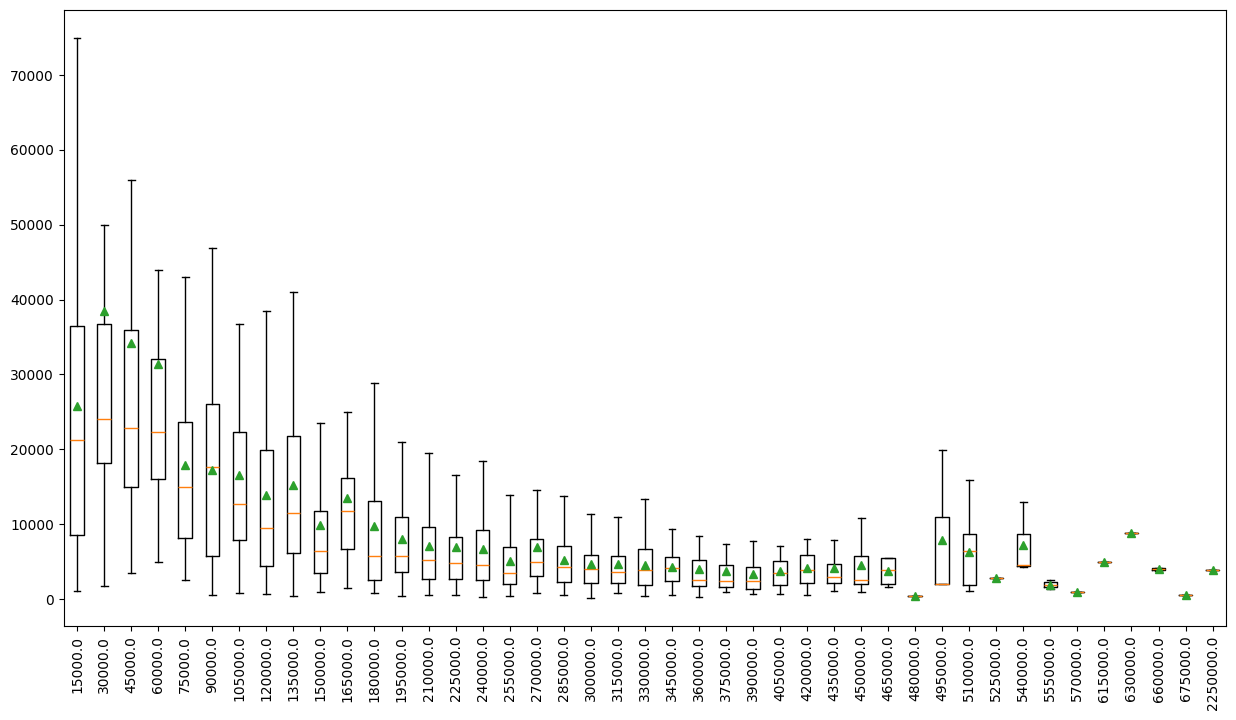

In [75]:
# atvaizduokite boxplotais kainos pasiskirstymą nuo ridos (15 000 km intervalais apvalintos)
sql="""select ceil(cast(replace(replace(rida,' ',''),'km','')as float)/15000)*15000 as ridas, group_concat(cast(replace(price,' ','') as float)) as kaina from autopliuslt
where rida <> 'Nenurodyta'
group by ridas  
;"""
C.execute(sql)
ans = C.fetchall()
x, y = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

# numpy fromstring
y2 = []
for i in y:
    skaiciai = np.fromstring(i, sep=',')
    y2.append(skaiciai)

#  boxplot:
fig, axis = plt.subplots(figsize = [15,8])

axis.boxplot(y2, showmeans = True, showfliers=False)
axis.tick_params(axis='x', rotation=90)
axis.set_xticklabels(x)
 # brezia linija grafike
plt.show()


Rodoma 5 eilutės iš 7
| 0 |   Dyzelinas    |129800,127896,10|
| 1 |    Benzinas    |253000,195405,18|
| 2 |Benzinas / dujos|258000,155000,20|
| 3 |Benzinas / elekt|292000,209000,45|
| 4 |    Elektra     |6000,47000,19800|


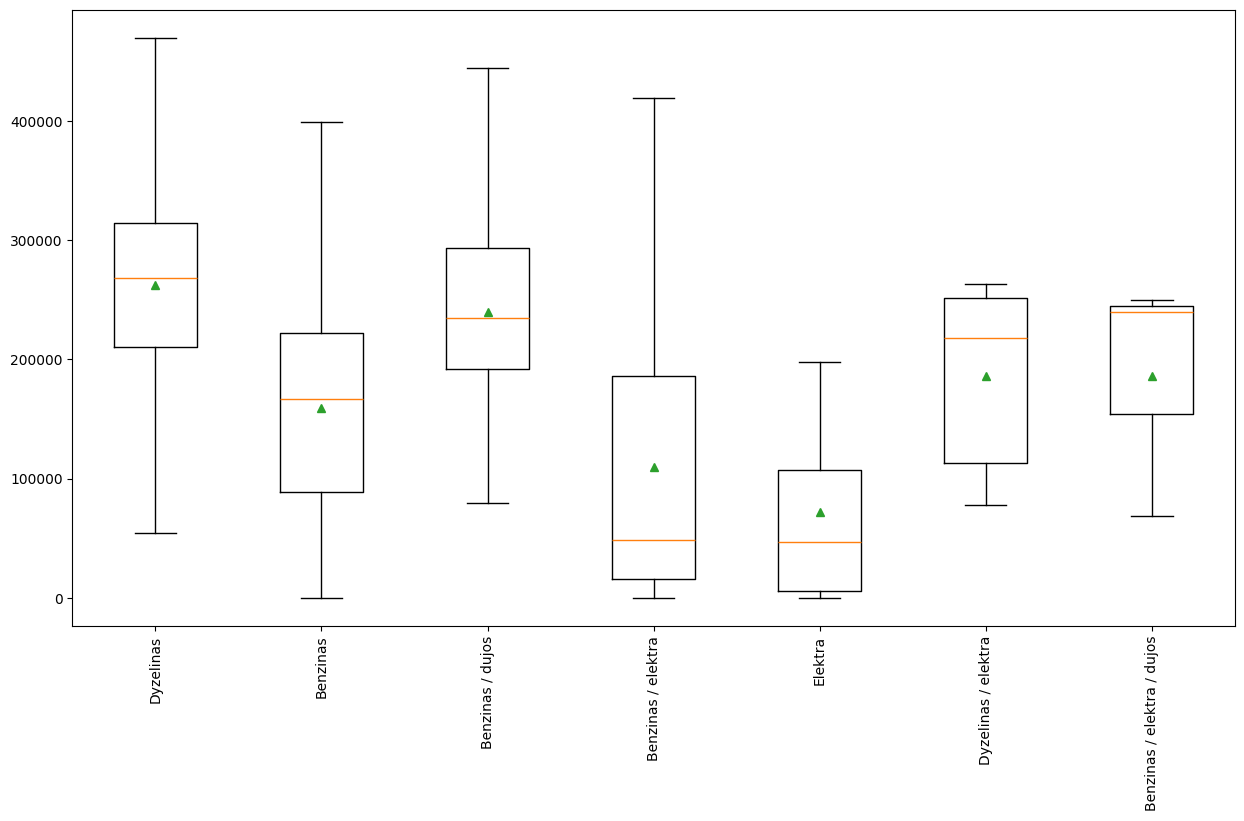

In [80]:
# atvaziduokite boxplotu ridos pasiskirstymą nuo kuro rūšies/tipo
sql="""select kuro_tipas, group_concat(cast(replace(replace(rida,' ',''),'km','')as float)) as rida  from autopliuslt
group by kuro_tipas
order by count(*) desc;"""
C.execute(sql)
ans = C.fetchall()
x, y = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

# numpy fromstring
y2 = []
for i in y:
    skaiciai = np.fromstring(i, sep=',')
    y2.append(skaiciai)

#  boxplot:
fig, axis = plt.subplots(figsize = [15,8])

axis.boxplot(y2, showmeans = True, showfliers=False)
axis.tick_params(axis='x', rotation=90)
axis.set_xticklabels(x)

plt.show()

Rodoma 5 eilutės iš 51
| 0 |      BMW       |253000,158486,74|
| 1 |   Volkswagen   |150869,300000,21|
| 2 |      Audi      |194000,280058,39|
| 3 | Mercedes-Benz  |194000,200000,17|
| 4 |     Toyota     |103149,273000,29|


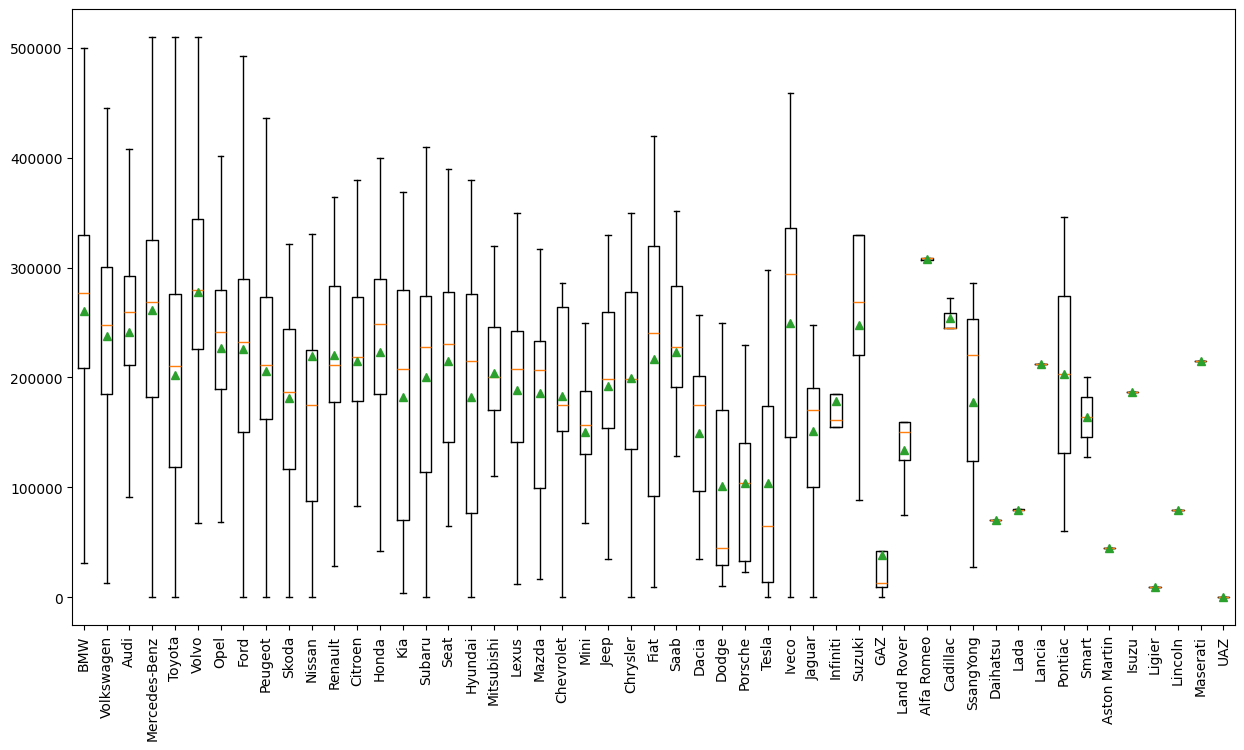

In [82]:
# atvaizduokite boxplotais ridos pasiskirstymo priklausomybę nuo gamintojo
sql="""select gamintojas, group_concat(cast(replace(replace(rida,' ',''),'km','')as float)) as rida  from autopliuslt
group by gamintojas
order by count(*) desc;"""
C.execute(sql)
ans = C.fetchall()
x, y = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

# numpy fromstring
y2 = []
for i in y:
    skaiciai = np.fromstring(i, sep=',')
    y2.append(skaiciai)

#  boxplot:
fig, axis = plt.subplots(figsize = [15,8])

axis.boxplot(y2, showmeans = True, showfliers=False)
axis.tick_params(axis='x', rotation=90)
axis.set_xticklabels(x)

plt.show()

In [ ]:
# pagal jūsų surinktas ir pastebėtas priklausomybes, jei matote:
# M-Benz, 12 metų, benzinas, 210 000 km -
# kokia kaina būtų konkurencinga/logiška/tikėtina? Kodėl?

# Manau būtų apie 10000, bet metai nebuvo vertinti.

| 0 |  Aston Martin  |     125000     |
| 1 |    Porsche     |21800,145000,145|
| 2 |     Tesla      |21800,25900,2850|
| 3 |   Land Rover   |55900,17000,5590|
| 4 |    Maserati    |     34950      |


AttributeError: 'str' object has no attribute 'set_facecolor'

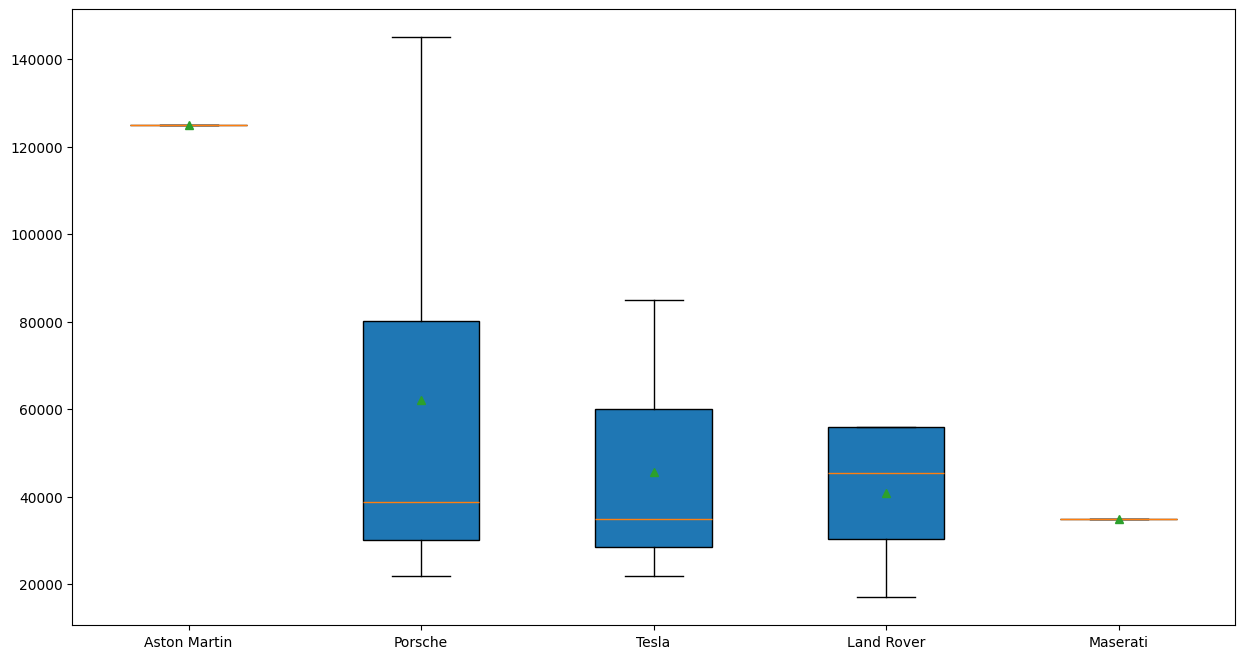

In [103]:
# suraskite visus gamintojus, kurių  modelių vidutinė kaina yra didesnė už vidutinę
# visų automobilių
# kainą.
# Iš jų atrinkite 5-kis brangiausius gamintojus, ir suraskite jų 
# parduodamų modelių vidutinį amžių.

# taip pat atvaizduokite su boxplot'ais šių 5-kių gamintojų parduodamų modelių kainų pasiskirstymą.
sql="""select gamintojas, kaina from
(select gamintojas, round(avg(cast(replace(price,' ','') as float)),0) as gprc,
if(round(avg(cast(replace(price,' ','') as float)),0)>(select round(avg(cast(replace(price,' ','') as float)),0) as vprc from autopliuslt),'Did','Maz') as grup,
round(avg(2024-substring(pagaminimo_data,1,4)),6) as amzius, group_concat(cast(replace(price,' ','') as float)) as kaina
from autopliuslt
group by gamintojas
having grup = 'Did'
order by gprc desc
limit 5) as f;"""
C.execute(sql)
ans = C.fetchall()
x, y = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

# numpy fromstring
y2 = []
for i in y:
    skaiciai = np.fromstring(i, sep=',')
    y2.append(skaiciai)

#  boxplot:
colors = ['peachpuff', 'orange', 'tomato', 'red', 'blue']
fig, axis = plt.subplots(figsize = [15,8])

bplot = axis.boxplot(y2, showmeans = True, showfliers=False, patch_artist=True, tick_labels=x)
for patch, color in zip(bplot, colors):
    patch.set_facecolor(color)
axis.tick_params(axis='x', rotation=90)
# axis.set_xticklabels(x)

plt.show()

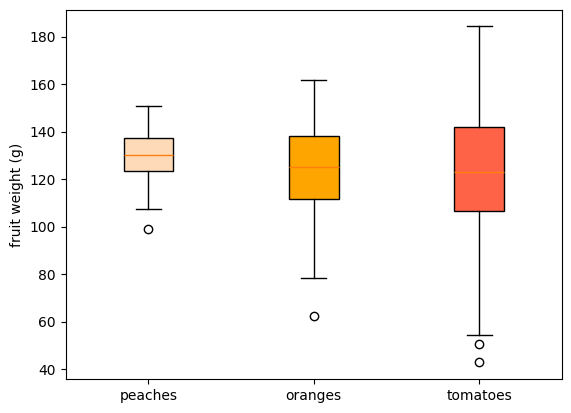

In [102]:
np.random.seed(19680801)
fruit_weights = [
    np.random.normal(130, 10, size=100),
    np.random.normal(125, 20, size=100),
    np.random.normal(120, 30, size=100),
]
labels = ['peaches', 'oranges', 'tomatoes']
colors = ['peachpuff', 'orange', 'tomato']

fig, ax = plt.subplots()
ax.set_ylabel('fruit weight (g)')

bplot = ax.boxplot(fruit_weights,
                   patch_artist=True,  # fill with color
                   tick_labels=labels)  # will be used to label x-ticks

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()